### Machine Learning project

# 0. Index
* [1. Feature engineering](#1)
    * [1.1 Cleaning and types](#1.1)
    * [1.2 Imputation and nulls](#1.2)
    * [1.3 Feature encoding](#1.3)
    * [1.4 Targets preparation](#1.4)
* [2. Modelling](#2)
    * [2.1 Settings for model application](#2.1)
        * [2.1.1 Feature and target division](#2.1.1)
        * [2.1.2 Some UDFs](#2.1.2)
    * [2.2 Model application](#2.2)
        * [2.1 ```df```](#2.2.1)
        * [2.2 ```df_status```](#2.2.2)
* [3. Grouping of the predictions](#3)
* [4. MAP@K metric](#4)

# 1. Feature engineering<a id=1>

### 1.1 Cleaning and types<a id=1.1>

The first thing is loading the dataframe. The first column of the CSV file is an index of the record. The types are diverse, but first all columns are loaded as strings.

In [1]:
import pandas as pd
pd.options.display.max_columns = None

# Load dataframe with first column as the index
df = pd.read_csv('../rec_sys_alumnos.csv', index_col=0, dtype=str)
df

,cod_persona,mes,pais,sexo,edad,fecha1,xti_empleado,xti_nuevo_cliente,num_antiguedad,xti_rel,fec_ult_cli_1t,xti_rel_1mes,tip_rel_1mes,indresi,indext,des_canal,xti_extra,tip_dom,cod_provincia,xti_actividad_cliente,imp_renta,id_segmento,mean_engagement,ind_prod1,ind_prod2,ind_prod3,ind_prod4,ind_prod5,ind_prod6,ind_prod7,ind_prod8,ind_prod9,ind_prod10,ind_prod11,ind_prod12,ind_prod13,ind_prod14,ind_prod15,ind_prod16,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25
0,178103,2015-01-28,ES,H,35,2015-01-12,N,0.0,6,1.0,NaN,1.0,A,S,N,KHL,N,1.0,29.0,1.0,87218.1,02 - PARTICULARES,6.134599897559383,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
1,503082,2015-01-28,ES,V,27,2012-08-10,N,0.0,35,1.0,NaN,1,I,S,N,KHE,N,1.0,40.0,0.0,70777.59,03 - UNIVERSITARIO,5.4146725371683715,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
2,502996,2015-01-28,ES,V,37,2012-08-10,N,0.0,35,1.0,NaN,1.0,A,S,N,KFC,N,1.0,8.0,0.0,104035.08,02 - PARTICULARES,6.301282644752064,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
3,503053,2015-01-28,ES,H,23,2012-08-10,N,0.0,35,1.0,NaN,1,A,S,N,KHE,N,1.0,39.0,1.0,136930.23,03 - UNIVERSITARIO,5.014351637772052,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,0
4,503031,2015-01-28,ES,H,44,2012-08-10,N,0.0,35,1.0,NaN,1.0,I,S,N,KAT,N,1.0,28.0,0.0,110245.53,02 - PARTICULARES,6.85176969517488,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641702,256354,2016-04-28,ES,V,25,2014-08-18,N,0.0,25,1.0,NaN,1,A,S,N,RED,N,1.0,30.0,1.0,81987.18000000001,02 - PARTICULARES,5.2185201144602615,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,0
641703,256273,2016-04-28,ES,H,65,2014-08-18,N,0.0,20,1.0,NaN,1,I,S,N,KAT,N,1.0,41.0,0.0,131135.7,02 - PARTICULARES,8.28077786276117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
641704,256253,2016-04-28,ES,V,42,2014-08-18,N,0.0,20,1.0,NaN,1,I,S,N,KFC,N,1.0,8.0,0.0,74745.29999999999,02 - PARTICULARES,6.69926081286394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
641705,256296,2016-04-28,ES,H,42,2014-08-18,N,0.0,20,1.0,NaN,1,I,S,N,KFC,N,1.0,28.0,0.0,215942.1,02 - PARTICULARES,6.69926081286394,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,0


In [2]:
# Check nulls in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634682 entries, 0 to 641706
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   cod_persona            634682 non-null  object
 1   mes                    634682 non-null  object
 2   pais                   634626 non-null  object
 3   sexo                   634617 non-null  object
 4   edad                   634682 non-null  object
 5   fecha1                 634626 non-null  object
 6   xti_empleado           634626 non-null  object
 7   xti_nuevo_cliente      634626 non-null  object
 8   num_antiguedad         634682 non-null  object
 9   xti_rel                634626 non-null  object
 10  fec_ult_cli_1t         36 non-null      object
 11  xti_rel_1mes           629040 non-null  object
 12  tip_rel_1mes           629040 non-null  object
 13  indresi                634626 non-null  object
 14  indext                 634626 non-null  object
 15  

Before going on, column ```fec_ult_cli_1t``` has only 36 non-null records. The best it can be done with this column is drop it completely.

In [3]:
# Drop 'fec_ult_cli_1t' column as it as only 36 non-null records out of 634682 records
df.drop('fec_ult_cli_1t', axis=1, inplace=True)

Lots of records have blank spaces at the beginning and at the end, and nulls are recorded as ```NA```. To properly identify the values of the records, ```strip``` must be applied. Also, a good practice is identify the nulls as ```float('nan')```.

In [4]:
# Trim spaces at the beginning and at the end of each record
df = df.apply(lambda x: x.str.strip())

# Set 'NA' strings as nan value
df = df.replace('NA', float('nan'))

Now, a manual classification of the columns by their type is performed, with 5 types: ```int``` and ```float``` for the numeric columns, ```datetime``` for the dates, ```category``` for the categorical columns and binary for the categorical columns with only two categories. For now, numeric columns are converted to ```float``` because nulls (```nan```) are of ```float``` type.

In [5]:
columns = df.columns.tolist()

# Manual classification of columns by their type (products are already binary)
asint = [0, 4, 8, 17]
products = list(range(22, 47))
asfloat = [19, 21]
asdate = [1, 5]
ascategory = [2, 6, 10, 11, 14, 20]
asbinary = [3, 7, 9, 12, 13, 15, 16, 18]

# Transform some columns to binary
from numpy import mod
for i in asbinary:
    options = pd.Series(df[columns[i]].unique()).sort_values().values
    binary = [0, 1]
    for j in [-2, -3]:
        df[columns[i]] = df[columns[i]].replace(options[mod(j, len(options))], binary[mod(j, len(binary)+1)])

# Convert numeric columns to float (including binary)
for i in asfloat + asint + products + asbinary:
    df[columns[i]] = df[columns[i]].astype('float64')

# Convert date columns to datetime
for i in asdate:
    df[columns[i]] = pd.to_datetime(df[columns[i]])

# Special case for 'xti_rel_1mes' that has numbers within the categories and differenciates between int and float
def try_num(x):
    try:
        return int(float(x))
    except ValueError:
        return x
df['xti_rel_1mes'] = df['xti_rel_1mes'].apply(lambda x: try_num(x))

# Convert some columns to categorical
for i in ascategory:
    df[columns[i]] = df[columns[i]].astype('category')

Check the types now:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634682 entries, 0 to 641706
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   cod_persona            634682 non-null  float64       
 1   mes                    634682 non-null  datetime64[ns]
 2   pais                   634626 non-null  category      
 3   sexo                   634617 non-null  float64       
 4   edad                   634626 non-null  float64       
 5   fecha1                 634626 non-null  datetime64[ns]
 6   xti_empleado           634626 non-null  category      
 7   xti_nuevo_cliente      634626 non-null  float64       
 8   num_antiguedad         634626 non-null  float64       
 9   xti_rel                634626 non-null  float64       
 10  xti_rel_1mes           629040 non-null  category      
 11  tip_rel_1mes           629040 non-null  category      
 12  indresi                634626 non-null  floa

The targets are the products (```ind_prodX``` for ```X = 1, ..., 25```), so no ```nan``` values are allowed there and those records must be dropped.

In [7]:
# Drop 'nan' values from the target columns
for i in products:
    df.drop(df[df[columns[i]].isna()].index, inplace=True)

### 1.2 Imputation and nulls<a id=1.2>

The dataframe has several null records. Before anything else, a study must be performed on this nulls, to decide if they are dropped or imputed and how.

In [8]:
df.isna().sum()

cod_persona                   0
mes                           0
pais                         28
sexo                         37
edad                         28
fecha1                       28
xti_empleado                 28
xti_nuevo_cliente            28
num_antiguedad               28
xti_rel                      28
xti_rel_1mes               5614
tip_rel_1mes               5614
indresi                      28
indext                       28
des_canal                  7150
xti_extra                    28
tip_dom                       0
cod_provincia              2918
xti_actividad_cliente        28
imp_renta                124136
id_segmento                7375
mean_engagement            5614
ind_prod1                     0
ind_prod2                     0
ind_prod3                     0
ind_prod4                     0
ind_prod5                     0
ind_prod6                     0
ind_prod7                     0
ind_prod8                     0
ind_prod9                     0
ind_prod

* ```tip_dom``` has no nulls, so it is already set.


* ```fec_ult_cli_1t``` was already dropped at the beginning.

* ```pais```, ```edad```, ```fecha1```, ```xti_empleado```, ```xti_nuevo_cliente```, ```num_antiguedad```, ```xti_rel```, ```indresi```, ```indext```, ```xti_extra``` and ```xti_actividad_cliente``` have the same number of nulls: 28. A quick check shows that they correspond to the same records. Hence, it is convenient to drop those records, since a lot of information is held in those columns.

In [9]:
df[df['pais'].isna() &
   df['edad'].isna() &
   df['fecha1'].isna() &
   df['xti_empleado'].isna() &
   df['xti_nuevo_cliente'].isna() &
   df['num_antiguedad'].isna() &
   df['xti_rel'].isna() &
   df['indresi'].isna() &
   df['indext'].isna() &
   df['xti_extra'].isna() &
   df['xti_actividad_cliente'].isna()
  ].shape[0]

28

In [10]:
# pais, edad, fecha1, xti_empleado, xti_nuevo_cliente, num_antiguedad, xti_rel, indresi, indext, xti_extra, xti_actividad_cliente
# Drop 28 records with nulls
df.drop(df[df['pais'].isna()].index, inplace=True)

* ```imp_renta``` has around 1/6 of the records in blank. Before deciding which imputation will be done, it is necessary to see the distribution of this variable. A boxplot shows that the outliers are too far away from the box; furthermore, the standard deviation is even higher than the mean. Hence, a good way to impute ```nan``` values is with the median.

Number of outliers: 30157
Mean: 136707.08404125244
Std: 333955.44313509366
Median: 101297.34


<AxesSubplot:>

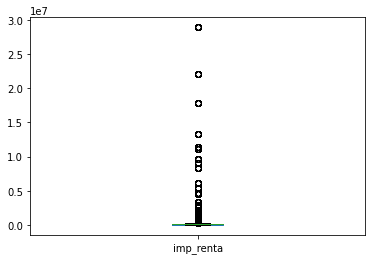

In [11]:
Q1 = df['imp_renta'].quantile(0.25)
Q3 = df['imp_renta'].quantile(0.75)
IQR = Q3 - Q1
n_outliers = ((df['imp_renta'] < (Q1 - 1.5 * IQR)) | (df['imp_renta'] > (Q3 + 1.5 * IQR))).sum()
print('Number of outliers:', n_outliers)

print('Mean:', df['imp_renta'].mean())
print('Std:', df['imp_renta'].std())
print('Median:', df['imp_renta'].median())

df['imp_renta'].plot.box()

In [12]:
# imp_renta
# Imputation of 'nan' values with the median
df['imp_renta'].fillna(round(df['imp_renta'].median(), 2), inplace=True)

* ```mean_engagement``` does not have too many nulls, but it is a numeric column and a study similar to that of ```imp_renta``` should be done.<br>
It seems that there are many outliers but compared with the 6 hundred thousand records they are just a few. Furthermore, the median is close to the mean, even though the standard deviation is a 21% of the mean. Hence, a good way to impute ```nan``` values is with the mean.

Number of outliers: 276
Mean: 6.425625940926844
Std: 1.3458810057023174
Median: 6.463518112854217


<AxesSubplot:>

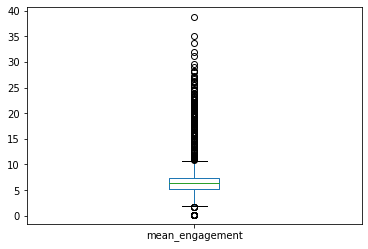

In [13]:
Q1 = df['mean_engagement'].quantile(0.25)
Q3 = df['mean_engagement'].quantile(0.75)
IQR = Q3 - Q1
n_outliers = ((df['mean_engagement'] < (Q1 - 1.5 * IQR)) | (df['mean_engagement'] > (Q3 + 1.5 * IQR))).sum()
print('Number of outliers:', n_outliers)

print('Mean:', df['mean_engagement'].mean())
print('Std:', df['mean_engagement'].std())
print('Median:', df['mean_engagement'].median())

df['mean_engagement'].plot.box()

In [14]:
# mean_engagement
# Imputation of 'nan' values with the mean of each province
df['mean_engagement'].fillna(round(df['mean_engagement'].mean(), 2), inplace=True)

* ```cod_provincia``` is a numeric column but each number is a code that matches a category (provinces). However, missing data could correspond to categories different than the categories already recorded, so they can be imputed with 'Other' category, or, in terms of numbers, with '0'.

In [15]:
# cod_provincia
# Replace 'nan' values with 0
df['cod_provincia'].fillna(0, inplace=True)

* ```des_canal``` is a categoric column that indicates the customer channel. Null data can be categorized as "Other".
<br> It is important to note that 'Other' is not included in the set of categories yet, so in order to replace ```nan```s with 'Other', this last must be added to the set of categories.

In [16]:
# des_canal
# Add 'Other' category and fill the 'nan' values with 'Other'
df['des_canal'] = df['des_canal'].cat.add_categories('Other').fillna('Other')

* Finally, ```sexo```, ```xti_rel_1mes```, ```tip_rel_1mes``` and ```id_segmento``` are categorical or binary columns and can be imputed in a simple way.<br>

In [17]:
# sexo, xti_rel_1mes, tip_rel_1mes, id_segmento
# Impute values with random choice according to the distribution of the corresponding column
from numpy import array
from numpy.random import choice
for col in ['sexo', 'xti_rel_1mes', 'tip_rel_1mes', 'id_segmento']:
    options = list(df[col].value_counts().to_dict().keys())
    value_counts = array(list(df[col].value_counts().to_dict().values()))
    probabs = value_counts / sum(value_counts)
    choices = {ind: choice(options, p=probabs) for ind in df[df[col].isna()].index}
    df[col] = df[col].fillna(choices)

In [18]:
# Convert all columns with integer data to int
for i in asint + products + asbinary:
    df[columns[i]] = df[columns[i]].astype('int64')
# Convert binary columns to uint
for i in products + asbinary:
    df[columns[i]] = df[columns[i]].astype('uint8')

Check that there are not nulls anymore and that the types are correct.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634623 entries, 0 to 641706
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   cod_persona            634623 non-null  int64         
 1   mes                    634623 non-null  datetime64[ns]
 2   pais                   634623 non-null  category      
 3   sexo                   634623 non-null  uint8         
 4   edad                   634623 non-null  int64         
 5   fecha1                 634623 non-null  datetime64[ns]
 6   xti_empleado           634623 non-null  category      
 7   xti_nuevo_cliente      634623 non-null  uint8         
 8   num_antiguedad         634623 non-null  int64         
 9   xti_rel                634623 non-null  uint8         
 10  xti_rel_1mes           634623 non-null  category      
 11  tip_rel_1mes           634623 non-null  category      
 12  indresi                634623 non-null  uint

In [20]:
df.isna().sum()

cod_persona              0
mes                      0
pais                     0
sexo                     0
edad                     0
fecha1                   0
xti_empleado             0
xti_nuevo_cliente        0
num_antiguedad           0
xti_rel                  0
xti_rel_1mes             0
tip_rel_1mes             0
indresi                  0
indext                   0
des_canal                0
xti_extra                0
tip_dom                  0
cod_provincia            0
xti_actividad_cliente    0
imp_renta                0
id_segmento              0
mean_engagement          0
ind_prod1                0
ind_prod2                0
ind_prod3                0
ind_prod4                0
ind_prod5                0
ind_prod6                0
ind_prod7                0
ind_prod8                0
ind_prod9                0
ind_prod10               0
ind_prod11               0
ind_prod12               0
ind_prod13               0
ind_prod14               0
ind_prod15               0
i

### 1.3 Feature encoding<a id=1.3>

A problem that might be passed over is ```num_antiguedad``` column. It is the customer seniority in months, but the minimum number it is found is 6, even though it can be ascertained there are clients with less seniority. This column can be recalculated from ```fecha1``` (date when the customer started being a client) and ```mes``` (date of the record).
Then, ```fecha1``` will be useless, since its information is held by ```num_antiguedad```. Also ```xti_nuevo_cliente``` is useless, since all the information on the novelty of a client is also held in ```num_antiguedad```.

In [21]:
# Recalculate 'num_antiguedad' from 'mes' and 'fecha1'
from numpy import timedelta64
df['num_antiguedad'] = round((df['mes'] - df['fecha1']) / timedelta64(1, 'M')).astype('int64')
# Drop 'fecha1' and 'xti_nuevo_cliente'
df.drop(['fecha1', 'xti_nuevo_cliente'], axis=1, inplace=True)

To include possible effects of stationality, the dates in ```mes``` can be converted to just the month and changed to categories. (This is saved in a new column, ```month```, so for now the information of ```mes``` is not lost.)

In [22]:
# Conversion of the dates in 'mes' to just the month and change to categories
df['month'] = df['mes'].dt.strftime('%b')
df['month'] = df['month'].astype('category')

Now there are only numeric columns (including ```int```, ```float``` and binary) and categoric columns. From here, two different approaches can be followed: regression and classification. In order to apply most of Machine Learning algorithms every column must be numeric, so a one-hot encoding will be performed to the categoric columns with few categories and an ordinal encoding will be performed to the categoric columns with lots of categories.

In [23]:
# Check categoric columns and how many categories they have
categoric_cols = list(df.select_dtypes(include=['category']).columns)
for col in categoric_cols:
    print(col, len(df[col].cat.categories))

pais 48
xti_empleado 4
xti_rel_1mes 5
tip_rel_1mes 4
des_canal 127
id_segmento 3
month 12


It is clear ```pais``` and ```des_canal``` have too many categories, so they will be ordinal encoded. The rest can be one-hot encoded.

In [24]:
# Ordinal encoding of 'pais' and 'des_canal'
ordenc_cols = ['pais', 'des_canal']
ordenc_dict = {}
for col in ordenc_cols:
    ordenc_dict[col] = {cat: num for num, cat in enumerate(df[col].cat.categories)}
    df[col] = df[col].apply(lambda x: ordenc_dict[col][x])
    df[col] = df[col].astype('int64')

# One-hot encoding of 'mes', 'xti_empleado', 'xti_rel1mes', 'tip_rel1mes' and 'id_segmento'
onehot_cols = [col for col in categoric_cols if col not in ordenc_cols]
df = pd.get_dummies(df, columns=onehot_cols)

One-hot encoding columns have been added at the end of the DataFrame. It is more comfortable to have the target columns at the end, so ```ind_prodX``` for ```X = 1, ..., 25``` are rearranged.

In [25]:
# Rearrange columns so target columns are at the end of the DataFrame
features = [col for col in df.columns if 'ind_prod' not in col]
targets = [col for col in df.columns if 'ind_prod' in col]
df = df[features + targets]
df

,cod_persona,mes,pais,sexo,edad,num_antiguedad,xti_rel,indresi,indext,des_canal,xti_extra,tip_dom,cod_provincia,xti_actividad_cliente,imp_renta,mean_engagement,xti_empleado_A,xti_empleado_B,xti_empleado_F,xti_empleado_N,xti_rel_1mes_0.0,xti_rel_1mes_1.0,xti_rel_1mes_2.0,xti_rel_1mes_3.0,xti_rel_1mes_4.0,tip_rel_1mes_A,tip_rel_1mes_I,tip_rel_1mes_P,tip_rel_1mes_R,id_segmento_01 - TOP,id_segmento_02 - PARTICULARES,id_segmento_03 - UNIVERSITARIO,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,ind_prod1,ind_prod2,ind_prod3,ind_prod4,ind_prod5,ind_prod6,ind_prod7,ind_prod8,ind_prod9,ind_prod10,ind_prod11,ind_prod12,ind_prod13,ind_prod14,ind_prod15,ind_prod16,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25
0,178103,2015-01-28,16,0,35,1,0,1,0,119,0,1,29,1,87218.10,6.134600,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,503082,2015-01-28,16,1,27,30,0,1,0,116,0,1,40,0,70777.59,5.414673,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,502996,2015-01-28,16,1,37,30,0,1,0,94,0,1,8,0,104035.08,6.301283,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,503053,2015-01-28,16,0,23,30,0,1,0,116,0,1,39,1,136930.23,5.014352,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,503031,2015-01-28,16,0,44,30,0,1,0,23,0,1,28,0,110245.53,6.851770,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641702,256354,2016-04-28,16,1,25,20,0,1,0,125,0,1,30,1,81987.18,5.218520,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
641703,256273,2016-04-28,16,0,65,20,0,1,0,23,0,1,41,0,131135.70,8.280778,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
641704,256253,2016-04-28,16,1,42,20,0,1,0,94,0,1,8,0,74745.30,6.699261,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
641705,256296,2016-04-28,16,0,42,20,0,1,0,94,0,1,28,0,215942.10,6.699261,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
# Check all types (except for 'mes') are numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634623 entries, 0 to 641706
Data columns (total 69 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   cod_persona                     634623 non-null  int64         
 1   mes                             634623 non-null  datetime64[ns]
 2   pais                            634623 non-null  int64         
 3   sexo                            634623 non-null  uint8         
 4   edad                            634623 non-null  int64         
 5   num_antiguedad                  634623 non-null  int64         
 6   xti_rel                         634623 non-null  uint8         
 7   indresi                         634623 non-null  uint8         
 8   indext                          634623 non-null  uint8         
 9   des_canal                       634623 non-null  int64         
 10  xti_extra                       634623 non-null  uint8  

### 1.4 Targets preparation for products transition between months<a id=1.4>

The goal is to predict what the clients are going to do the following month. For that, it is necessary to divide the dataframe by months...

In [27]:
meses = pd.Series(df['mes'].unique()).sort_values().values

# List of dataframes. Each dataframe contains the records corresponding to one month
df_xmes = [df[df['mes'] == mes] for mes in meses]

# Create a new DataFrame with the same features but the products
df_status = df[features].copy()
# List of dataframes. Each dataframe contains the records corresponding to in-between months
df_status_xmes = [df_status[df_status['mes'] == mes] for mes in meses]

... and compare consecutive months to see what they have done in the past.

If a client of one month is not found in the following month, it is dropped, since it means abandonement and the goal is to predict new contracts. Furthermore, it is considered that the products that have ```1``` at the first month are activations.

In [28]:
# For each month calculate the product status with respect to the previous month, and store it in "df_status_xmes".
# After each calculation, append the DataFrame to new DataFrame "df_status"
# First transition is equal to data of first month
del(df_status)
df_status = pd.DataFrame(columns=features)

df_status_xmes[0][targets] = df_xmes[0][targets]
df_status = df_status.append(df_status_xmes[0])

for i in range(1, len(df_xmes)):
    product_status = df_xmes[i].merge(df_xmes[i-1][['cod_persona'] + targets], on='cod_persona', how='left')
    for p in targets:
        df_status_xmes[i][p] = product_status[p+'_x'].values - product_status[p+'_y'].fillna(0).values
    df_status = df_status.append(df_status_xmes[i])

# Change all -1 for 0 in the target columns
df_status[targets] = df_status[targets].replace(-1, 0)

# Assure that the types are correct
df_status = df_status.astype(df.dtypes.to_dict())

df_status

,cod_persona,mes,pais,sexo,edad,num_antiguedad,xti_rel,indresi,indext,des_canal,xti_extra,tip_dom,cod_provincia,xti_actividad_cliente,imp_renta,mean_engagement,xti_empleado_A,xti_empleado_B,xti_empleado_F,xti_empleado_N,xti_rel_1mes_0.0,xti_rel_1mes_1.0,xti_rel_1mes_2.0,xti_rel_1mes_3.0,xti_rel_1mes_4.0,tip_rel_1mes_A,tip_rel_1mes_I,tip_rel_1mes_P,tip_rel_1mes_R,id_segmento_01 - TOP,id_segmento_02 - PARTICULARES,id_segmento_03 - UNIVERSITARIO,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,ind_prod1,ind_prod2,ind_prod3,ind_prod4,ind_prod5,ind_prod6,ind_prod7,ind_prod8,ind_prod9,ind_prod10,ind_prod11,ind_prod12,ind_prod13,ind_prod14,ind_prod15,ind_prod16,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25
0,178103,2015-01-28,16,0,35,1,0,1,0,119,0,1,29,1,87218.10,6.134600,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,503082,2015-01-28,16,1,27,30,0,1,0,116,0,1,40,0,70777.59,5.414673,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,502996,2015-01-28,16,1,37,30,0,1,0,94,0,1,8,0,104035.08,6.301283,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,503053,2015-01-28,16,0,23,30,0,1,0,116,0,1,39,1,136930.23,5.014352,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,503031,2015-01-28,16,0,44,30,0,1,0,23,0,1,28,0,110245.53,6.851770,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641702,256354,2016-04-28,16,1,25,20,0,1,0,125,0,1,30,1,81987.18,5.218520,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
641703,256273,2016-04-28,16,0,65,20,0,1,0,23,0,1,41,0,131135.70,8.280778,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
641704,256253,2016-04-28,16,1,42,20,0,1,0,94,0,1,8,0,74745.30,6.699261,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
641705,256296,2016-04-28,16,0,42,20,0,1,0,94,0,1,28,0,215942.10,6.699261,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now in ```ind_prodX``` there is ```0``` if the product was kept or never contracted in the corresponding period, ```-1``` if the product was abandoned and ```1``` if the product was contracted.

###### Check value_counts of ```df``` and ```df_status```:

In [29]:
# Check value_counts of each product in "df"
prod_counts = pd.DataFrame()
for col in targets:
    prod_counts = prod_counts.append(df[col].value_counts())
prod_counts = prod_counts.fillna(0).astype('int64')

# Check value_counts of each product in "df_status"
prodstatus_counts = pd.DataFrame()
for col in targets:
    prodstatus_counts = prodstatus_counts.append(df_status[col].value_counts())
prodstatus_counts = prodstatus_counts.fillna(0).astype('int64')

# Merge "prod_counts" and "prodstatus_counts" on index with respective prefixes
prod_counts = prod_counts.add_prefix('df counts/')
prodstatus_counts = prodstatus_counts.add_prefix('df_status counts/')
counts = prod_counts.merge(prodstatus_counts, left_index=True, right_index=True)
# Create multi-index from prefixes of columns
counts.columns = pd.MultiIndex.from_tuples(counts.columns.str.split('/', expand=True).values)
counts

df counts         df_status counts       
                   0       1                0      1
ind_prod1     634559      64           634619      4
ind_prod2     634623       0           634623      0
ind_prod3     215149  419474           602632  31991
ind_prod4     634309     314           634598     25
ind_prod5     582744   51879           629881   4742
ind_prod6     628281    6342           634165    458
ind_prod7     628389    6234           633744    879
ind_prod8     550903   83720           629097   5526
ind_prod9     607012   27611           632753   1870
ind_prod10    633337    1286           634291    332
ind_prod11    633418    1205           634513    110
ind_prod12    607054   27569           632188   2435
ind_prod13    581860   52763           630481   4142
ind_prod14    622756   11867           633755    868
ind_prod15    631275    3348           634397    226
ind_prod16    628744    5879           634223    400
ind_prod17    632898    1725           634506    117
ind_prod18    600631   33992           632297   2326
ind_prod19    605743   28880           629533   5090
ind_prod20    617802   16821           633385   1238
ind_prod21    632239    2384           634465    158
ind_prod22    599361   35262           629235   5388
ind_prod23    596357   38266           628438   6185
ind_prod24    552861   81762           622821  11802
ind_prod25    592814   41809           629015   5608

# 2. Modelling<a id=2>

### 2.1 Settings for model application<a id=2.1>

#### 2.1.1 Feature and target division<a id=2.1.1>

Create dataframe for prediction. From the information of the features of the last month, manually modify them so the information of the following month is got.
- Columns that do not change (they stay the same forever):
    - ```cod_persona```
    - ```pais```
    - ```sexo```
    - ```indext```
    - ```des_canal```

- Columns that are expected not to change (they can change but the expected value for them is to continue as they are):
    - ```xti_empleado```
    - ```xti_rel```
    - ```xti_rel_1mes```
    - ```tip_rel_1mes```
    - ```indresi```
    - ```xti_extra```
    - ```tip_dom```
    - ```cod_provincia```
    - ```xti_actividad_cliente```
    - ```imp_renta```
    - ```id_segmento```
    - ```mean_engagement```

- Columns that do change:
    - ```mes```: increases in 1 month
    - ```edad```: 1/12 possibilities to increase in 1
    - ```num_antiguedad```: increases in 1 month

In [30]:
# Dataframe with the information of the clients of the last month
to_predict = df[df['mes'] == meses[-1]][features]
# Change columns that do change the following month
to_predict['mes'] = to_predict['mes'] + pd.DateOffset(months=1)
to_predict['edad'] = to_predict['edad'].apply(lambda x: x + choice([0, 1], p=[11/12, 1/12]))
to_predict['num_antiguedad'] = to_predict['num_antiguedad'] + 1
# Drop information not to be used in the ML model
X_to_predict = to_predict.drop(['cod_persona', 'mes'], axis=1)

Definition of features and targets for both ```df``` and ```df_status```.

In [31]:
# Features
X = df.drop(['cod_persona', 'mes'] + targets, axis=1)
# Targets for df
y = df[targets]
# Targets for df_status
ystatus = df_status[targets]

Perform PCA on the features and select the components that explain at least the 80% of the variance. These new components are saved in a new dataframe so later on it can be chosen which dataframe will be used.

In [32]:
# PCA
from sklearn.decomposition import PCA
from numpy import argmax
pca = PCA()
pca.fit(X)
pca_components = pca.components_
Xpca = pca.transform(X)
Xpca_to_predict = pca.transform(X_to_predict)

# Feature selection: number of principal components
n_comp = argmax(pca.explained_variance_ratio_.cumsum() > 0.8) + 1
Xpca_sel = pd.DataFrame(Xpca[:, :n_comp], index=X.index)
Xpca_sel_to_predict = pd.DataFrame(Xpca_to_predict[:, :n_comp], index=X_to_predict.index)

#### 2.1.2 Some UDFs<a id=2.1.2>

Definition of a function to apply a Machine Learning model.

In [33]:
def apply_model(X, y, model,
                X_predict=None, norm=True, test_per=0.3, seed=None):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from numpy import unique, array
    
    # Split into train and test sets
    from numpy import unique
    classes, counts = unique(y, return_counts=True)
    if (len(classes) > 1) and (sum(counts >= 5) == len(classes)):
        strat = y
    else:
        strat = None
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=test_per, random_state=seed, stratify=strat)
    
    # Data normalization
    if norm == True:
        esc = StandardScaler().fit(X_tr)
        X_trn = esc.transform(X_tr)
        X_ten = esc.transform(X_te)
        if hasattr(X_predict, 'len') or hasattr(X_predict, 'shape'):
            Xn_predict = esc.transform(X_predict)
    else:
        X_trn = X_tr
        X_ten = X_te
        Xn_predict = X_predict
    
    # Apply model
    model.fit(X_trn, y_tr)
    
    # Predict over test
    y_val = model.predict(X_ten)
    
    # Return arrays
    testing = y_te.to_frame(name='y_test')
    testing['y_validate'] = y_val
    ret = {'testing': testing}
    
    # Predict over the new month
    if hasattr(X_predict, 'len') or hasattr(X_predict, 'shape'):
        y_pred = model.predict_proba(Xn_predict)
        try:
            prob_1 = y_pred[:, 1]
        except IndexError:
            prob_1 = 0
        ret['prediction'] = pd.DataFrame(prob_1, index=X_predict.index, columns=['y_pred'])
    
    return ret

As a reminder, there are four metrics to evaluate a classification model from its confusion matrix.

. | **Predicted 0** | **Predicted 1**
:-----------------:|:---------------:|:---------------:
**Actual 0** | TN | FP
**Actual 1** | FN | TP

$$precision = \frac{TP}{TP + FP} \ \ \ \ \ \ \ \ \ \ \ \ 
recall = \frac{TP}{TP + FN} \ \ \ \ \ \ \ \ \ \ \ \ 
f1{\text -}score = 2 \cdot \frac{precision \cdot recall}{precision + recall}  \ \ \ \ \ \ \ \ \ \ \ \ 
accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

Definition of a function to plot a confusion matrix.

In [34]:
def plot_confusion_matrix(y_true, y_pred, ax=None,
                          normalize=False, fig_title='Confusion matrix', color='Blues'):
    '''
    This function prints and plots the confusion matrix of y_true and y_pred.
    Normalization can be applied by setting 'normalize=True'.
    '''
    from sklearn.metrics import confusion_matrix
    from numpy import unique, append, newaxis, arange
    from itertools import product
    from matplotlib.pyplot import gca, get_cmap
    ax = ax or gca()
    classes_true = unique(y_true)
    classes_pred = unique(y_pred)
    classes = unique(append(classes_true, classes_pred))
    cmatrix = confusion_matrix(y_true, y_pred, labels=classes)
    cmap = get_cmap(color)
    if normalize:
        cmatrix = cmatrix.astype('float') / cmatrix.sum(axis=1)[:, newaxis]
        fig_title = 'Normalized ' + fig_title
    ax.imshow(cmatrix, interpolation='nearest', cmap=cmap)
    ax.set_title(fig_title)
    tick_marks = arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cmatrix.max() / 2.
    for i, j in product(range(cmatrix.shape[0]), range(cmatrix.shape[1])):
        ax.text(j, i, format(cmatrix[i, j], fmt),
                horizontalalignment='center',
                color='white' if (cmatrix[i, j] > thresh and len(classes) > 1) else 'black')
    ax.set_ylabel('True classes')
    ax.set_xlabel('Predicted classes')
    return ax

Definition of a function to print a list of ```sklearn.metrics.classification_report```s as a dataframe.

In [35]:
def report_to_dataframe(report):
    tuple_keys = [('0', 'precision'), ('0', 'recall'), ('0', 'f1-score'),
                  ('1', 'precision'), ('1', 'recall'), ('1', 'f1-score')]
    tuple_values = []
    for d in report:
        for keys in tuple_keys:
            try:
                tuple_values.append(d[keys[0]][keys[1]])
            except KeyError:
                tuple_values.append(float('nan'))

    tuple_dict = {key: [] for key in tuple_keys}
    for i in range(len(tuple_values)):
        tuple_dict[tuple_keys[mod(i, len(tuple_keys))]].append(round(tuple_values[i], 3))

    tuple_dict[('accuracy', '')] = []
    for d in report:
        tuple_dict[('accuracy', '')].append(round(d['accuracy'], 3))

    return pd.DataFrame(tuple_dict, index=targets)

Definition of a function to print elapsed time in format ```00:00:00```.

In [36]:
def elapsed_time(t):
    hours, rem = divmod(t, 3600)
    minutes, seconds = divmod(rem, 60)
    return '{:0>2}:{:0>2}:{:0>2}'.format(int(hours), int(minutes), round(seconds))

### 2.2 Model application<a id=2.2>

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import subplots, tight_layout
from sklearn.metrics import classification_report
from time import time, strftime

#### 2.2.1 ```df```<a id=2.2.1>

In [38]:
# Define models for each target (after previous corresponding grid search)
models = {'ind_prod1': DecisionTreeClassifier(),
          'ind_prod2': DecisionTreeClassifier(),
          'ind_prod3': KNeighborsClassifier(n_neighbors=30, p=1, weights='distance'),
          'ind_prod4': KNeighborsClassifier(n_neighbors=5, p=2, weights='distance'),
          'ind_prod5': KNeighborsClassifier(n_neighbors=1, p=1, weights='distance'),
          'ind_prod6': KNeighborsClassifier(n_neighbors=1, p=1, weights='distance'),
          'ind_prod7': KNeighborsClassifier(n_neighbors=5, p=2, weights='distance'),
          'ind_prod8': KNeighborsClassifier(n_neighbors=5, p=2, weights='distance'),
          'ind_prod9': KNeighborsClassifier(n_neighbors=5, p=2, weights='distance'),
          'ind_prod10': KNeighborsClassifier(n_neighbors=1, p=1, weights='distance'),
          'ind_prod11': KNeighborsClassifier(n_neighbors=1, p=1, weights='distance'),
          'ind_prod12': KNeighborsClassifier(n_neighbors=1, p=1, weights='distance'),
          'ind_prod13': KNeighborsClassifier(n_neighbors=2, p=1, weights='distance'),
          'ind_prod14': KNeighborsClassifier(n_neighbors=1, p=1, weights='distance'),
          'ind_prod15': KNeighborsClassifier(n_neighbors=1, p=1, weights='distance'),
          'ind_prod16': KNeighborsClassifier(n_neighbors=1, p=1, weights='distance'),
          'ind_prod17': KNeighborsClassifier(n_neighbors=5, p=2, weights='distance'),
          'ind_prod18': KNeighborsClassifier(n_neighbors=1, p=1, weights='distance'),
          'ind_prod19': KNeighborsClassifier(n_neighbors=3, p=1, weights='distance'),
          'ind_prod20': KNeighborsClassifier(n_neighbors=1, p=1, weights='distance'),
          'ind_prod21': KNeighborsClassifier(n_neighbors=1, p=1, weights='distance'),
          'ind_prod22': KNeighborsClassifier(n_neighbors=5, p=1, weights='distance'),
          'ind_prod23': KNeighborsClassifier(n_neighbors=6, p=1, weights='distance'),
          'ind_prod24': KNeighborsClassifier(n_neighbors=4, p=1, weights='distance'),
          'ind_prod25': KNeighborsClassifier(n_neighbors=1, p=1, weights='distance')}

In [39]:
# Apply models
model_df = []
for i in range(len(targets)):
    print(f'Applying model to target {i + 1}/{len(targets)}. Started at {strftime("%d/%m/%Y-%H:%M:%S")} ...', end=' ')
    t0 = time()
    model_df.append(apply_model(Xpca_sel, y[targets[i]], models[targets[i]], X_predict=Xpca_sel_to_predict))
    print(f'({elapsed_time(time() - t0)})')
print('Done!')

Applying model to target 1/25. Started at 29/05/2021-12:05:34 ... (00:00:01)
Applying model to target 2/25. Started at 29/05/2021-12:05:35 ... (00:00:00)
Applying model to target 3/25. Started at 29/05/2021-12:05:36 ... (00:00:08)
Applying model to target 4/25. Started at 29/05/2021-12:05:44 ... (00:00:06)
Applying model to target 5/25. Started at 29/05/2021-12:05:50 ... (00:00:07)
Applying model to target 6/25. Started at 29/05/2021-12:05:57 ... (00:00:12)
Applying model to target 7/25. Started at 29/05/2021-12:06:09 ... (00:00:08)
Applying model to target 8/25. Started at 29/05/2021-12:06:17 ... (00:00:08)
Applying model to target 9/25. Started at 29/05/2021-12:06:24 ... (00:00:06)
Applying model to target 10/25. Started at 29/05/2021-12:06:30 ... (00:00:05)
Applying model to target 11/25. Started at 29/05/2021-12:06:35 ... (00:00:04)
Applying model to target 12/25. Started at 29/05/2021-12:06:40 ... (00:00:05)
Applying model to target 13/25. Started at 29/05/2021-12:06:45 ... (00:00

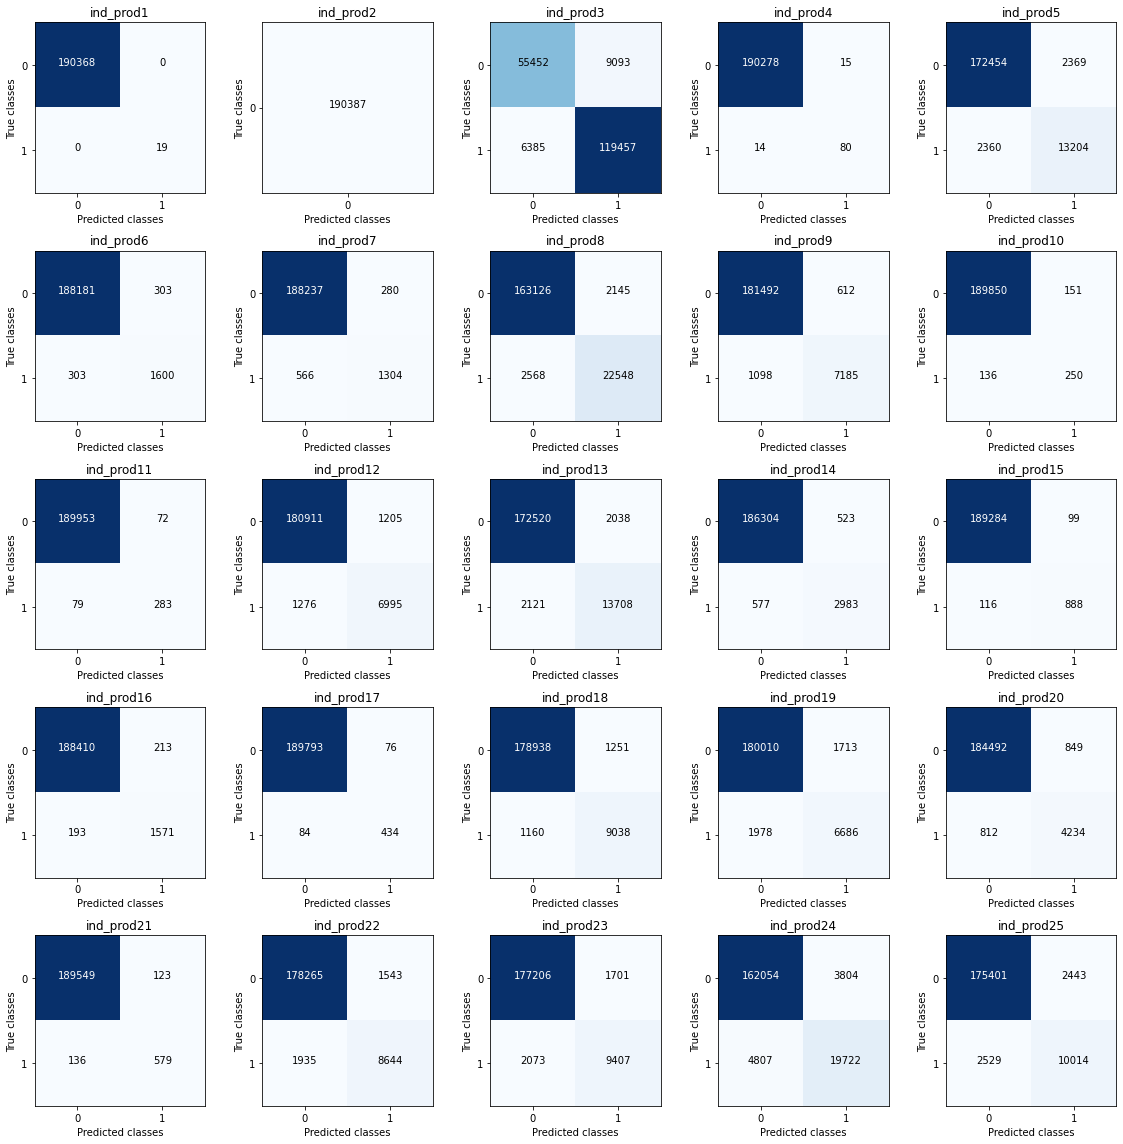

In [40]:
# Plot confusion matrices
fig, axs = subplots(5, 5, figsize=(16, 16))
rows = 0
for i in range(len(targets)):
    plot_confusion_matrix(model_df[i]['testing']['y_test'], model_df[i]['testing']['y_validate'],
                          ax=axs[rows][mod(i, 5)], fig_title=targets[i])
    if mod(i, 5) == 4:
        rows += 1
tight_layout()

In [41]:
# Classification reports
model_df_report = []
for i in range(len(targets)):
    model_df_report.append(classification_report(model_df[i]['testing']['y_test'], model_df[i]['testing']['y_validate'],
                                                 output_dict=True, zero_division=0))

report_to_dataframe(model_df_report)

0                         1                 accuracy
           precision recall f1-score precision recall f1-score         
ind_prod1      1.000  1.000    1.000     1.000  1.000    1.000    1.000
ind_prod2      1.000  1.000    1.000       NaN    NaN      NaN    1.000
ind_prod3      0.897  0.859    0.878     0.929  0.949    0.939    0.919
ind_prod4      1.000  1.000    1.000     0.842  0.851    0.847    1.000
ind_prod5      0.986  0.986    0.986     0.848  0.848    0.848    0.975
ind_prod6      0.998  0.998    0.998     0.841  0.841    0.841    0.997
ind_prod7      0.997  0.999    0.998     0.823  0.697    0.755    0.996
ind_prod8      0.985  0.987    0.986     0.913  0.898    0.905    0.975
ind_prod9      0.994  0.997    0.995     0.922  0.867    0.894    0.991
ind_prod10     0.999  0.999    0.999     0.623  0.648    0.635    0.998
ind_prod11     1.000  1.000    1.000     0.797  0.782    0.789    0.999
ind_prod12     0.993  0.993    0.993     0.853  0.846    0.849    0.987
ind_prod13     0.988  0.988    0.988     0.871  0.866    0.868    0.978
ind_prod14     0.997  0.997    0.997     0.851  0.838    0.844    0.994
ind_prod15     0.999  0.999    0.999     0.900  0.884    0.892    0.999
ind_prod16     0.999  0.999    0.999     0.881  0.891    0.886    0.998
ind_prod17     1.000  1.000    1.000     0.851  0.838    0.844    0.999
ind_prod18     0.994  0.993    0.993     0.878  0.886    0.882    0.987
ind_prod19     0.989  0.991    0.990     0.796  0.772    0.784    0.981
ind_prod20     0.996  0.995    0.996     0.833  0.839    0.836    0.991
ind_prod21     0.999  0.999    0.999     0.825  0.810    0.817    0.999
ind_prod22     0.989  0.991    0.990     0.849  0.817    0.833    0.982
ind_prod23     0.988  0.990    0.989     0.847  0.819    0.833    0.980
ind_prod24     0.971  0.977    0.974     0.838  0.804    0.821    0.955
ind_prod25     0.986  0.986    0.986     0.804  0.798    0.801    0.974

#### 2.2.2 ```df_status```<a id=2.2.2>

```df``` dataframe was a perfect example of disbalanced classes, but a mean recall of more than 0.8 was reached for class ```1```. Now, ```df_status``` is even more disbalanced. To overcome this problem, oversampling is performed before applying the models.

In [42]:
# Function to decide the duplication factor
def duplication_factor(number, mag_order_lim):
    if number:
        first_sig_cyp = int('{:e}'.format(number)[0])
        mag_order_num = int('{:e}'.format(number)[-1])
        factor = 10**(mag_order_lim - mag_order_num) / first_sig_cyp
        return int(factor)
    else:
        return 1

# Make oversampling (OS)
df_statusOS = df_status.copy()
for t in range(len(targets)):
    aux_df = df_statusOS[df_statusOS[targets[t]] == 1]
    factor = duplication_factor(aux_df.shape[0], 3)
    df_statusOS = df_statusOS.append([aux_df] * factor, ignore_index=True)

# Features oversampled
XstatusOS = df_statusOS.drop(['cod_persona', 'mes'] + targets, axis=1)
# Targets for df_status_os (oversampled)
ystatusOS = df_statusOS[targets]

# PCA for "df_statusOS"
from sklearn.decomposition import PCA
from numpy import argmax
pca_statusOS = PCA()
pca_statusOS.fit(XstatusOS)
pca_statusOS_components = pca_statusOS.components_
XstatusOS_pca = pca_statusOS.transform(XstatusOS)
XstatusOS_pca_topredict = pca_statusOS.transform(X_to_predict)

# Feature selection: number of principal components for "df_statusOS"
n_comp_statusOS = argmax(pca_statusOS.explained_variance_ratio_.cumsum() > 0.8) + 1
XstatusOS_pcasel = pd.DataFrame(XstatusOS_pca[:, :n_comp], index=XstatusOS.index)
XstatusOS_pcasel_topredict = pd.DataFrame(XstatusOS_pca_topredict[:, :n_comp], index=X_to_predict.index)

In [43]:
# Define models for each target (after previous corresponding grid search)
models_statusOS = {'ind_prod1': KNeighborsClassifier(n_neighbors=2, p=1, weights='uniform'),
                   'ind_prod2': DecisionTreeClassifier(),
                   'ind_prod3': DecisionTreeClassifier(),
                   'ind_prod4': KNeighborsClassifier(n_neighbors=2, p=1, weights='uniform'),
                   'ind_prod5': DecisionTreeClassifier(),
                   'ind_prod6': KNeighborsClassifier(n_neighbors=2, p=1, weights='distance'),
                   'ind_prod7': KNeighborsClassifier(n_neighbors=2, p=1, weights='distance'),
                   'ind_prod8': DecisionTreeClassifier(),
                   'ind_prod9': DecisionTreeClassifier(),
                   'ind_prod10': KNeighborsClassifier(n_neighbors=4, p=1, weights='distance'),
                   'ind_prod11': KNeighborsClassifier(n_neighbors=2, p=1, weights='distance'),
                   'ind_prod12': KNeighborsClassifier(n_neighbors=6, p=1, weights='distance'),
                   'ind_prod13': DecisionTreeClassifier(),
                   'ind_prod14': KNeighborsClassifier(n_neighbors=2, p=1, weights='distance'),
                   'ind_prod15': KNeighborsClassifier(n_neighbors=2, p=1, weights='distance'),#
                   'ind_prod16': DecisionTreeClassifier(),#
                   'ind_prod17': KNeighborsClassifier(n_neighbors=2, p=2, weights='distance'),#
                   'ind_prod18': DecisionTreeClassifier(),
                   'ind_prod19': DecisionTreeClassifier(),
                   'ind_prod20': DecisionTreeClassifier(),
                   'ind_prod21': KNeighborsClassifier(n_neighbors=4, p=1, weights='distance'),#
                   'ind_prod22': DecisionTreeClassifier(),
                   'ind_prod23': DecisionTreeClassifier(),
                   'ind_prod24': DecisionTreeClassifier(),
                   'ind_prod25': DecisionTreeClassifier()}

In [44]:
# Apply models
model_df_statusOS = []
for i in range(len(targets)):
    print(f'Applying model to target {i + 1}/{len(targets)}. Started at {strftime("%d/%m/%Y-%H:%M:%S")} ...', end=' ')
    t0_statusOS = time()
    model_df_statusOS.append(apply_model(XstatusOS_pcasel, ystatusOS[targets[i]],
                                         models_statusOS[targets[i]], X_predict=XstatusOS_pcasel_topredict))
    print(f'({elapsed_time(time() - t0_statusOS)})')
print('Done!')

Applying model to target 1/25. Started at 29/05/2021-12:08:25 ... (00:00:17)
Applying model to target 2/25. Started at 29/05/2021-12:08:43 ... (00:00:00)
Applying model to target 3/25. Started at 29/05/2021-12:08:43 ... (00:00:04)
Applying model to target 4/25. Started at 29/05/2021-12:08:47 ... (00:00:17)
Applying model to target 5/25. Started at 29/05/2021-12:09:04 ... (00:00:04)
Applying model to target 6/25. Started at 29/05/2021-12:09:09 ... (00:00:05)
Applying model to target 7/25. Started at 29/05/2021-12:09:14 ... (00:00:06)
Applying model to target 8/25. Started at 29/05/2021-12:09:19 ... (00:00:04)
Applying model to target 9/25. Started at 29/05/2021-12:09:23 ... (00:00:05)
Applying model to target 10/25. Started at 29/05/2021-12:09:28 ... (00:00:05)
Applying model to target 11/25. Started at 29/05/2021-12:09:33 ... (00:00:05)
Applying model to target 12/25. Started at 29/05/2021-12:09:39 ... (00:00:05)
Applying model to target 13/25. Started at 29/05/2021-12:09:44 ... (00:00

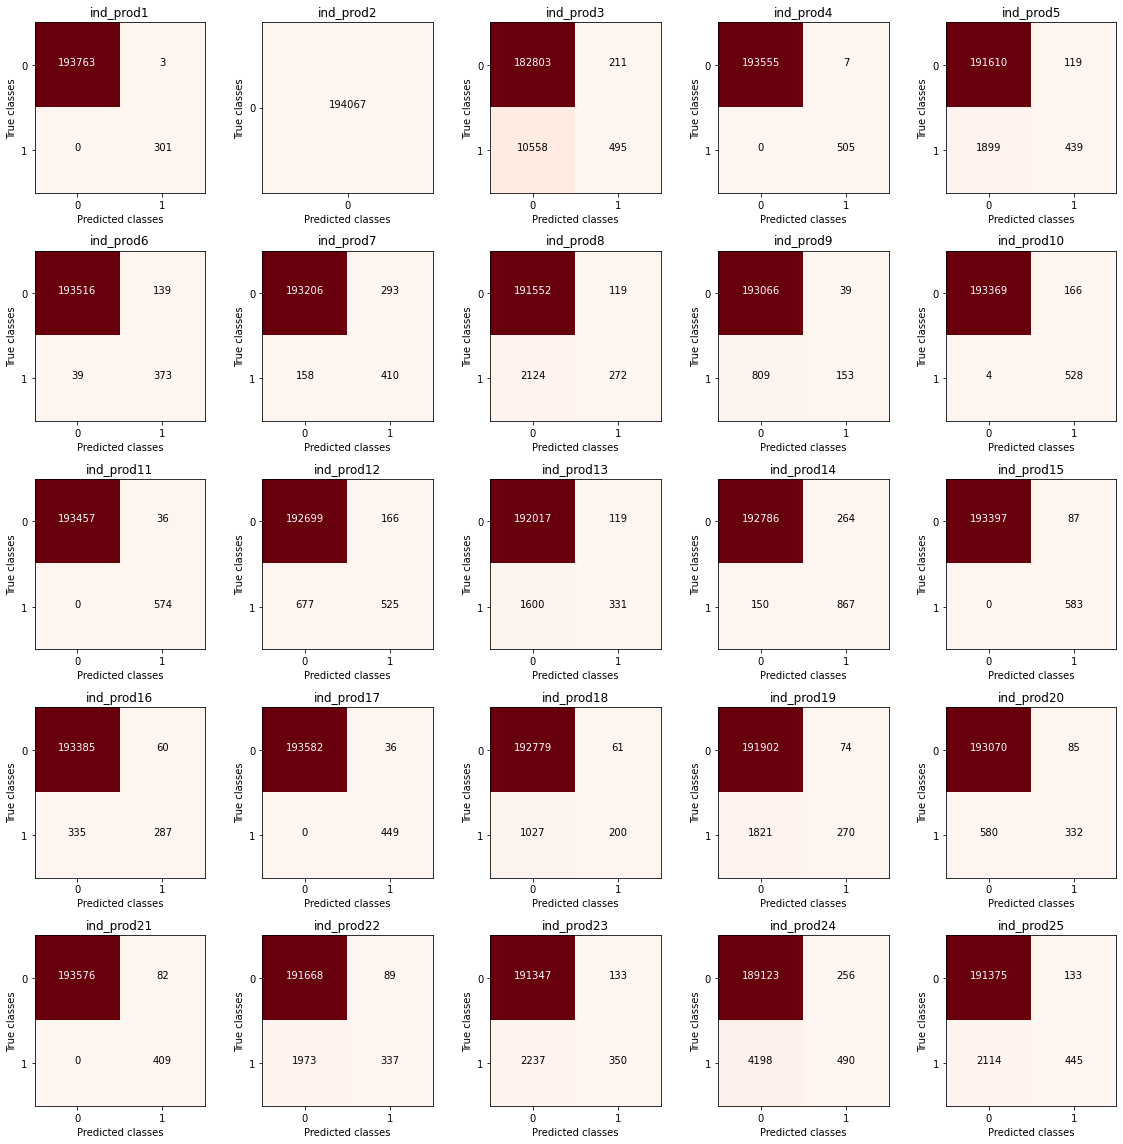

In [45]:
# Plot confusion matrices
fig_statusOS, axs_statusOS = subplots(5, 5, figsize=(16, 16))
rows_statusOS = 0
for i in range(len(targets)):
    plot_confusion_matrix(model_df_statusOS[i]['testing']['y_test'], model_df_statusOS[i]['testing']['y_validate'],
                          ax=axs_statusOS[rows_statusOS][mod(i, 5)], fig_title=targets[i], color='Reds')
    if mod(i, 5) == 4:
        rows_statusOS += 1
tight_layout()

In [46]:
# Classification reports
model_df_statusOS_report = []
for i in range(len(targets)):
    model_df_statusOS_report.append(classification_report(model_df_statusOS[i]['testing']['y_test'],
                                                          model_df_statusOS[i]['testing']['y_validate'],
                                                          output_dict=True, zero_division=0))

report_to_dataframe(model_df_statusOS_report)

0                         1                 accuracy
           precision recall f1-score precision recall f1-score         
ind_prod1      1.000  1.000    1.000     0.990  1.000    0.995    1.000
ind_prod2      1.000  1.000    1.000       NaN    NaN      NaN    1.000
ind_prod3      0.945  0.999    0.971     0.701  0.045    0.084    0.945
ind_prod4      1.000  1.000    1.000     0.986  1.000    0.993    1.000
ind_prod5      0.990  0.999    0.995     0.787  0.188    0.303    0.990
ind_prod6      1.000  0.999    1.000     0.729  0.905    0.807    0.999
ind_prod7      0.999  0.998    0.999     0.583  0.722    0.645    0.998
ind_prod8      0.989  0.999    0.994     0.696  0.114    0.195    0.988
ind_prod9      0.996  1.000    0.998     0.797  0.159    0.265    0.996
ind_prod10     1.000  0.999    1.000     0.761  0.992    0.861    0.999
ind_prod11     1.000  1.000    1.000     0.941  1.000    0.970    1.000
ind_prod12     0.996  0.999    0.998     0.760  0.437    0.555    0.996
ind_prod13     0.992  0.999    0.996     0.736  0.171    0.278    0.991
ind_prod14     0.999  0.999    0.999     0.767  0.853    0.807    0.998
ind_prod15     1.000  1.000    1.000     0.870  1.000    0.931    1.000
ind_prod16     0.998  1.000    0.999     0.827  0.461    0.592    0.998
ind_prod17     1.000  1.000    1.000     0.926  1.000    0.961    1.000
ind_prod18     0.995  1.000    0.997     0.766  0.163    0.269    0.994
ind_prod19     0.991  1.000    0.995     0.785  0.129    0.222    0.990
ind_prod20     0.997  1.000    0.998     0.796  0.364    0.500    0.997
ind_prod21     1.000  1.000    1.000     0.833  1.000    0.909    1.000
ind_prod22     0.990  1.000    0.995     0.791  0.146    0.246    0.989
ind_prod23     0.988  0.999    0.994     0.725  0.135    0.228    0.988
ind_prod24     0.978  0.999    0.988     0.657  0.105    0.180    0.977
ind_prod25     0.989  0.999    0.994     0.770  0.174    0.284    0.988

# 3. Grouping of the predictions<a id=3>

Now all the predictions for each of the 25 products are aggregated by index (which is a client identifier after all), both for ```model_df``` and ```model_df_statusOS```.

Then, the predictions also include clients that keep their products. Hence, it is necessary to collate the predictions with the last month, as it was done in section [1.4](#1.4). As products are going to be ordered by their probability later, the probability of contracting a product that is already contracted is 0. To differenciate that from the actual 0 probabilities of other products, the probability of contracting a product that is already contracted is going to be imputed by -1.

Finally, columns are named after ```targets```.

In [47]:
# Creation of all predictions dataframes for "df" and "df_statusOS" with the predictions for each target
preds_df = model_df[0]['prediction'].copy()
preds_df_statusOS = model_df_statusOS[0]['prediction'].copy()
for i in range(1, len(targets)):
    preds_df = preds_df.merge(model_df[i]['prediction'],
                              how='left', left_index=True, right_index=True, suffixes=['', str(i+1)])
    preds_df_statusOS = preds_df_statusOS.merge(model_df_statusOS[i]['prediction'],
                                                how='left', left_index=True, right_index=True, suffixes=['', str(i+1)])

# Dataframes to numpy so a mask can be applied based on the values of the last month
from numpy import putmask
mask = df[df['mes'] == meses[-1]][targets].to_numpy() == 1
putmask(preds_df.to_numpy(), mask, [-1])
putmask(preds_df_statusOS.to_numpy(), mask, [-1])

# Rename columns after targets
preds_df.columns = targets
preds_df_statusOS.columns = targets

Now, as there are two kinds of predictions, one from ```df``` and one from ```df_statusOS```, they are compared and the predictions with higher recall for ```1``` are kept in the final predictions dataframe ```preds```.

Additionally, ```cod_persona``` is added to ```preds``` dataframe so each client is identified by its code.

In [48]:
# Get the best predictions in the final predictions dataframe "preds"
preds = pd.DataFrame()
for i in range(len(targets)):
    recall1_df = report_to_dataframe(model_df_report)['1']['recall'].loc[targets[i]]
    recall1_df_status = report_to_dataframe(model_df_statusOS_report)['1']['recall'].loc[targets[i]]
    if recall1_df >= recall1_df_status:
        preds[targets[i]] = preds_df[targets[i]]
    else:
        preds[targets[i]] = preds_df_statusOS[targets[i]]

# Add 'cod_persona' as identifier and set index to it
preds = df['cod_persona'].to_frame().merge(preds, how='right', left_index=True, right_index=True)
preds.index = preds['cod_persona']
preds.drop('cod_persona', axis=1, inplace=True)

Finally, a new column in ```preds``` dataframe is created with the products ordered by their value (probability).

In [49]:
# Function that orders the columns by the values of a row
def order_prods(row):
    return row.sort_values(ascending=False).index[1:].to_list()

preds['Predictions'] = preds.apply(order_prods, axis=1)

In [50]:
preds

,ind_prod1,ind_prod2,ind_prod3,ind_prod4,ind_prod5,ind_prod6,ind_prod7,ind_prod8,ind_prod9,ind_prod10,ind_prod11,ind_prod12,ind_prod13,ind_prod14,ind_prod15,ind_prod16,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25,Predictions
cod_persona,,,,,,,,,,,,,,,,,,,,,,,,,,
656861,0.0,0,0.000009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,"[ind_prod1, ind_prod14, ind_prod24, ind_prod23..."
656868,0.0,0,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,"[ind_prod1, ind_prod14, ind_prod24, ind_prod23..."
656829,0.0,0,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,"[ind_prod1, ind_prod14, ind_prod24, ind_prod23..."
656831,0.0,0,0.000082,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.617634,0.708146,1.0,0.0,"[ind_prod5, ind_prod18, ind_prod23, ind_prod22..."
656990,0.0,0,0.000058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,"[ind_prod1, ind_prod14, ind_prod24, ind_prod23..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256354,0.0,0,0.655716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,"[ind_prod3, ind_prod1, ind_prod14, ind_prod23,..."
256273,0.0,0,0.232062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,"[ind_prod1, ind_prod14, ind_prod24, ind_prod23..."
256253,0.0,0,0.000038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,"[ind_prod1, ind_prod14, ind_prod24, ind_prod23..."


A CSV is saved with the predictions (as the last column is a list, with their elements separated by commas, the separator in the CSV should be different than a comma):

In [51]:
# Save CSV with the predictions
preds.to_csv('predictions.csv', sep=';', index=False)

# 4. MAP@K metric<a id=4>

The evaluation is going to be made through the metric MAP@K for $K=7$. Here this metric is defined:

In [52]:
def apk(actual, predicted, k):
    if len(predicted) > k:
        predicted = predicted[:k]
    score = 0
    num_hits = 0
    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1
            score += num_hits / (i + 1)
    if not actual:
        return 0
    return score / min(len(actual), k)

def mapk(actual, predicted, k):
    from numpy import mean
    return mean([apk(a, p, k) for a, p in zip(actual, predicted)])

To apply the metric, the predictions must be checked against the actual data. These data is in form of one-hot encoding by products, so a reverse-one-hot-encoding must be applied. Furthermore, these data might be products contracted, not products activated, so a mask should also be applied.

In [53]:
# Read solutions with 'cod_persona' as index and order indices like "preds" dataframe
actual = pd.read_csv('../soluciones.csv', index_col='cod_persona')
actual.reindex(preds.index)

# Mask over products already contracted last month (just in case)
putmask(actual[targets].to_numpy(), mask, [0])

# Reverse one-hot encoding to obtain a list similar to the lists in 'prediction' column in "preds" dataframe
def reverse_onehot(row):
    prods = []
    for target in targets:
        if row[target] == 1:
            prods.append(target)
    return prods

actual['Solutions'] = actual.apply(reverse_onehot, axis=1)

Then merge column ```predictions``` on ```preds``` dataframe with column ```solutions``` on ```actual``` dataframe by ```cod_persona```.

In [54]:
# Join Series by 'cod_persona'
ps = actual['Solutions'].to_frame().merge(preds['Predictions'].to_frame(), left_index=True, right_index=True)

Metric applied for $K=7$ and normalized over the solutions with themselves:

In [55]:
metric_actual = mapk(ps['Solutions'], ps['Solutions'], 7)
metric_preds = mapk(ps['Solutions'], ps['Predictions'], 7)

metric_results = metric_preds / metric_actual
metric_results

0.2982134508782476